In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Načtení dat
wires_in_df = pd.read_csv("./data/wires_in")
wires_out_df = pd.read_csv("./data/wires_out")

# wires_in: kreditní transakce
wires_in_df['Beneficiary'] = wires_in_df['Account']
wires_in_df['Direction'] = 'in'

# wires_out: debetní transakce
wires_out_df['Originator'] = wires_out_df['Account']
wires_out_df['Direction'] = 'out'

# Spojení obou datových sad
combined_df = pd.concat([wires_in_df, wires_out_df], ignore_index=True)

# Úprava typů
combined_df['Account'] = combined_df['Account'].astype(str)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Agregace statistik podle účtu a směru
agg_df = combined_df.groupby(['Account', 'Direction']).agg(
    Sum=('Amount', 'sum'),
    Mean=('Amount', 'mean'),
    Min=('Amount', 'min'),
    Max=('Amount', 'max'),
    SD=('Amount', 'std'),
    Count=('Amount', 'count')
).reset_index()

# Restrukturalizace (pivot) – jeden řádek na účet
agg_pivot = agg_df.pivot(index='Account', columns='Direction')
agg_pivot.columns = [f"{stat}_{dir_.capitalize()}" for stat, dir_ in agg_pivot.columns]
agg_pivot.reset_index(inplace=True)


# Export do csv 
csv_path = "./data/accounts_summary.csv"
agg_pivot.to_csv(csv_path, index=False)

# Tabulka šmírovačka
agg_pivot

,Account,Sum_In,Sum_Out,Mean_In,Mean_Out,Min_In,Min_Out,Max_In,Max_Out,SD_In,SD_Out,Count_In,Count_Out
0,10000432,937259,1079093,10898.360465,9465.728070,198,134,19860,19979,5827.522615,5860.595511,86,114
1,10000582,935782,1114349,9747.729167,10714.894231,184,151,19570,19996,5890.337296,5976.368038,96,104
2,10000619,941979,1158601,10351.417582,10629.366972,1013,208,19965,19790,5286.559425,5797.061774,91,109
3,10000673,941106,918664,9411.060000,9186.640000,195,230,19423,19486,5807.454455,5765.338575,100,100
4,10000762,1023319,927097,9839.605769,9657.260417,73,244,19931,19564,6059.170223,5713.143692,104,96
5,10000922,1057918,1036889,10579.180000,10368.890000,449,230,19182,19641,5673.031565,5358.989794,100,100
6,10000973,1040009,942479,10196.166667,9617.132653,36,4,19964,19636,6192.746364,5717.535427,102,98
7,10001087,1057385,1010354,10789.642857,9905.431373,488,377,19954,19897,5172.281742,6007.983379,98,102
8,10001128,1175606,909456,9962.762712,11090.926829,275,709,19961,19669,5475.586142,5851.990892,118,82
9,10001182,1036563,924488,9778.896226,9834.978723,213,175,19483,19468,6035.065019,5806.068707,106,94


/var/folders/69/wt5shy0s3hd876vm1pzlrtbc0000gn/T/ipykernel_33431/1765563031.py:46: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/pvacha/Projects/dm-money-laundering/jlab_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


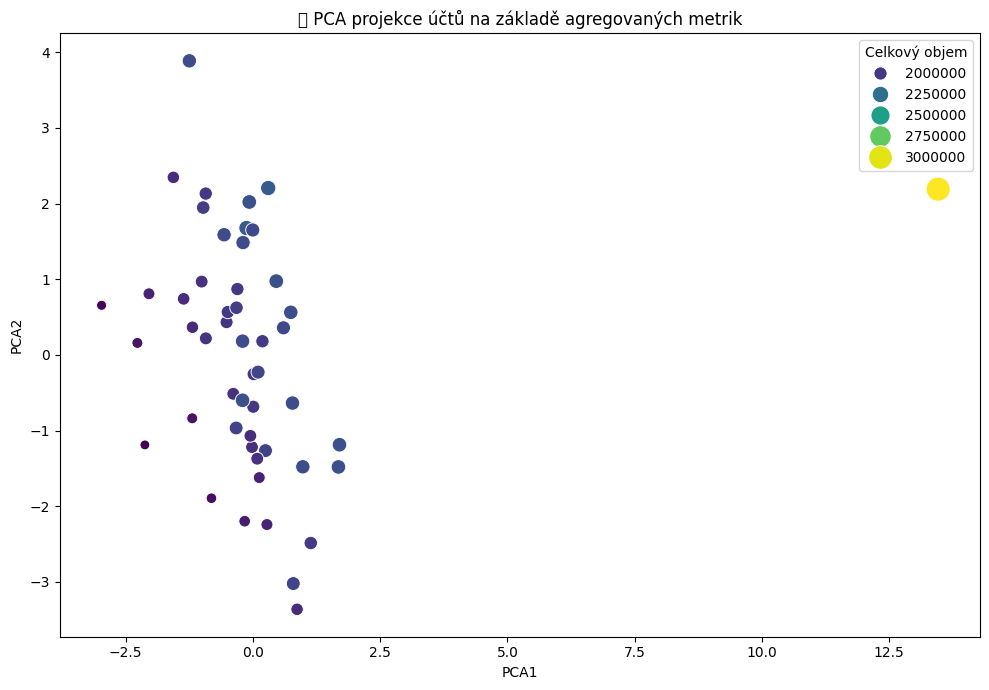